In [4]:
import importlib
import pprint
import csv
import os
import random

import mysklearn.myutils
importlib.reload(mysklearn.myutils)
import mysklearn.myutils as myutils

import mysklearn.plot_utils
importlib.reload(mysklearn.plot_utils)
import mysklearn.plot_utils as plot_utils

import mysklearn.mypytable
importlib.reload(mysklearn.mypytable)
from mysklearn.mypytable import MyPyTable 

import mysklearn.myevaluation
importlib.reload(mysklearn.myevaluation)
import mysklearn.myevaluation as myevaluation

import mysklearn.myclassifiers
importlib.reload(mysklearn.myclassifiers)
from mysklearn.myclassifiers import MyNaiveBayesClassifier, MyDecisionTreeClassifier, MyRandomForestClassifier

fname = os.path.join("data", 'track-audio-features-all.txt')
track_data = MyPyTable().load_from_file(fname)

ModuleNotFoundError: No module named 'SpotifyAPIClient'

In [68]:
genre = track_data.get_column('playlist_subgenre')
danceability = myutils.format_num(track_data.get_column('danceability'))
energy = myutils.format_num(track_data.get_column('energy'))
loudness = track_data.get_column('loudness')
speechiness = myutils.format_num(track_data.get_column('speechiness'))
tempo = track_data.get_column('tempo')
valence = myutils.format_num(track_data.get_column('valence'))
popularity = track_data.get_column("track_popularity")

genre_bins = myutils.bin_genre(genre)
dance_bins = myutils.bin_vals(danceability)
energy_bins = myutils.bin_vals(energy)
loudness_bins = myutils.bin_loudness(loudness)
speechiness_bins = myutils.bin_vals(speechiness)
tempo_bins = myutils.bin_tempo(tempo)
valence_bins = myutils.bin_vals(valence)
popularity_bins = myutils.bin_vals(popularity)

# Data Analysis
Our data set includes a lot of different attributes for each song, 23 attrbutes to be exact. These attributes range from 'song id's' so that they could be looked up using Spotify's API to 'runtime' which denotes the duration a song last. For the purposes of our goal we stuck with 7 different attributes for our classification. Specifically we used playlist_subgenre(String), danceability(float), energy(float), loudness(float), speechiness(float), tempo(float), and valnece(float). 

1. playlist_subgenre(String): A string used to classify which type of genre a song is under

1. danceability(float): Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity.

1. energy(float): Energy represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy.

1. loudness(float): The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude).

1. speechiness(float): Speechiness detects the presence of spoken words in a track.

1. tempo(float): The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

1. valnece(float): Describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive, while tracks with low valence sound more negative.
    

# Figure 1 
Shows the distrbution of our 5000 songs based on subgenre. As we can see 'electropop' has the most songs in our dataset

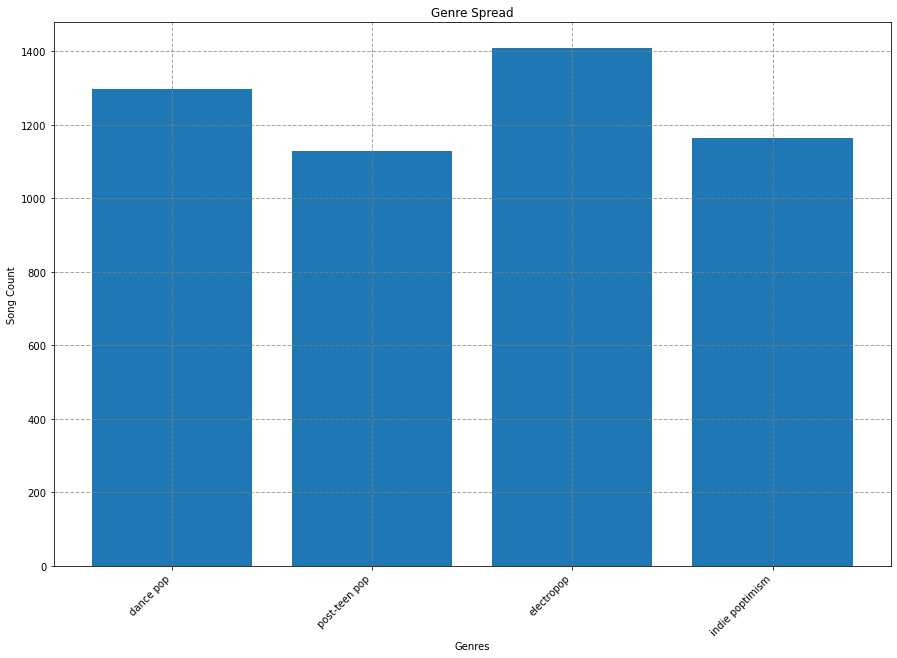

In [69]:
genre_bins_count = [[len(genre_bins[0])], [len(genre_bins[1])], [len(genre_bins[2])], [len(genre_bins[3])]]

x_vals = ['dance pop', 'post-teen pop', 'electropop', 'indie poptimism']
y_vals = []
for i in range(len(genre_bins_count)):
    y_vals.append(genre_bins_count[i][0])
plot_utils.frequency_chart(x_vals, y_vals,  "Genre Spread", "Genres", "Song Count")

# Figure 2 
Shows the distrbution of our 5000 songs based on Dacebaility. A majority of our songs fall between the 61-70 percent Dancebaility range.

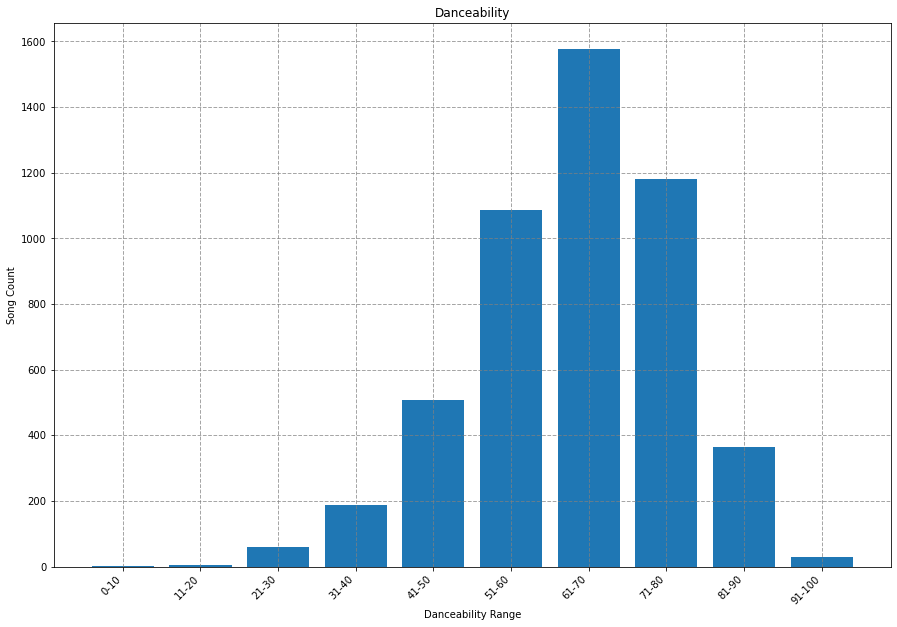

In [70]:


dance_bin_count = [[len(dance_bins[0])],[len(dance_bins[1])],[len(dance_bins[2])],[len(dance_bins[3])],[len(dance_bins[4])],[len(dance_bins[5])],[len(dance_bins[6])],[len(dance_bins[7])],[len(dance_bins[8])],[len(dance_bins[9])]]


x_vals = ['0-10','11-20','21-30','31-40','41-50','51-60','61-70','71-80','81-90','91-100']
y_vals = []
for i in range(len(dance_bin_count)):
    y_vals.append(dance_bin_count[i][0])

plot_utils.frequency_chart(x_vals, y_vals,  "Danceability", "Danceability Range", "Song Count")



# Figure 3
Shows the distrbution of our 5000 songs based on Energy. A majority of our songs fall between the 71-80 percent Energy range.

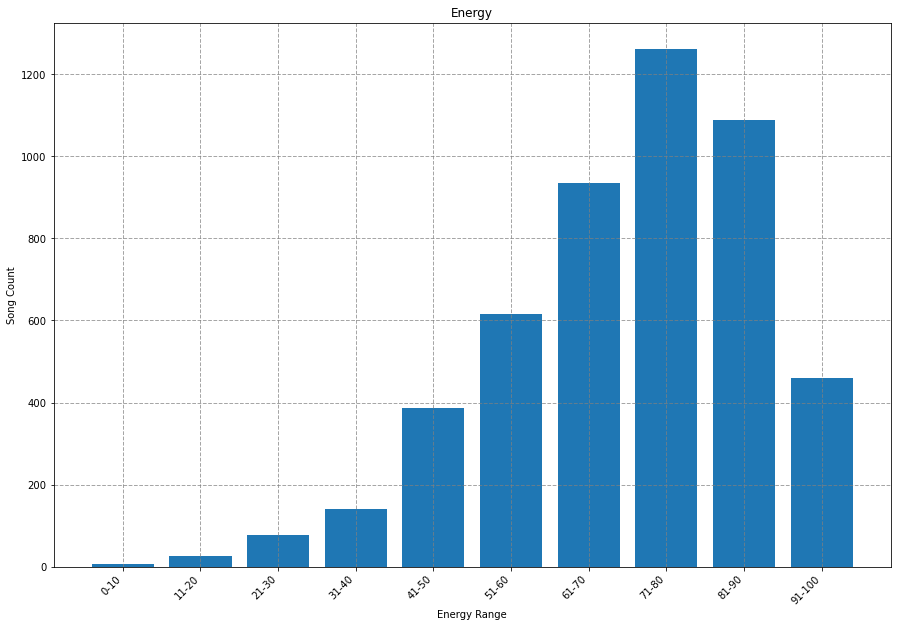

In [71]:
energy_bin_count = [[len(energy_bins[0])],[len(energy_bins[1])],[len(energy_bins[2])],[len(energy_bins[3])],[len(energy_bins[4])],[len(energy_bins[5])],[len(energy_bins[6])],[len(energy_bins[7])],[len(energy_bins[8])],[len(energy_bins[9])]]


x_vals = ['0-10','11-20','21-30','31-40','41-50','51-60','61-70','71-80','81-90','91-100']
y_vals = []
for i in range(len(energy_bin_count)):
    y_vals.append(energy_bin_count[i][0])

plot_utils.frequency_chart(x_vals, y_vals,  "Energy", "Energy Range", "Song Count")

# Figure 4 
Shows the distrbution of our 5000 songs based on Loudness. A majority of our songs are between 0 and -10.55. The closer the values are to 0 the louder a song is. These will be binned and given a rank in the classification to better the results.

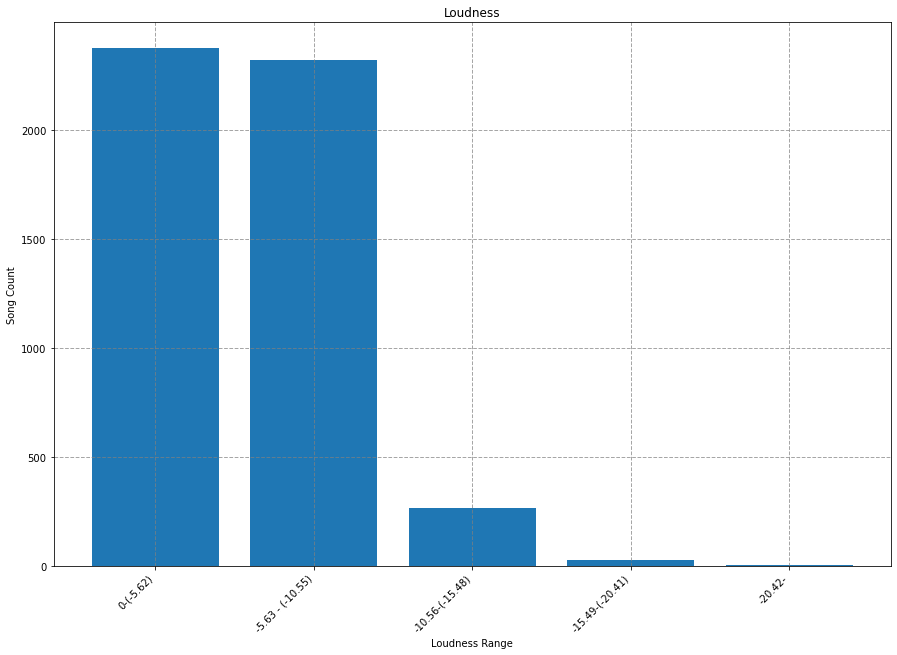

In [72]:
loudness_bin_count = [[len(loudness_bins[0])],[len(loudness_bins[1])],[len(loudness_bins[2])],[len(loudness_bins[3])],[len(loudness_bins[4])]]

x_vals = ['0-(-5.62)','-5.63 - (-10.55)','-10.56-(-15.48)','-15.49-(-20.41)','-20.42-']
y_vals = []
for i in range(len(loudness_bin_count)):
    y_vals.append(loudness_bin_count[i][0])

plot_utils.frequency_chart(x_vals, y_vals,  "Loudness", "Loudness Range", "Song Count")

# Figure 5 
Shows the distrbution of our 5000 songs based on Speechiness. A majority of our songs fall in the 1 - 10 range since the closer a songs Speechiness is to 0 the less words are in the song as a whole meaning the song is made up of a majority of beats and sounds.

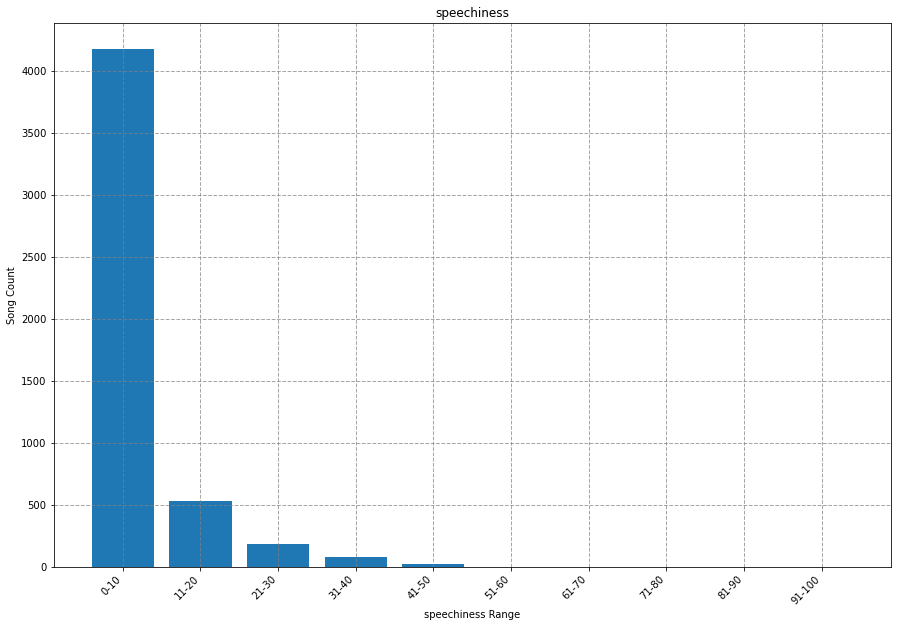

In [73]:
speechiness_bin_count = [[len(speechiness_bins[0])],[len(speechiness_bins[1])],[len(speechiness_bins[2])],[len(speechiness_bins[3])],[len(speechiness_bins[4])],[len(speechiness_bins[5])],[len(speechiness_bins[6])],[len(speechiness_bins[7])],[len(speechiness_bins[8])],[len(speechiness_bins[9])]]

x_vals = ['0-10','11-20','21-30','31-40','41-50','51-60','61-70','71-80','81-90','91-100']
y_vals = []
for i in range(len(speechiness_bin_count)):
    y_vals.append(speechiness_bin_count[i][0])

plot_utils.frequency_chart(x_vals, y_vals,  "speechiness", "speechiness Range", "Song Count")

# Figure 6
Shows the distrbution of our 5000 songs based on Tempo. A majority of our songs fall within the middle average Tempo range. These values will also be bined much like the Loudness values to better the classification results.

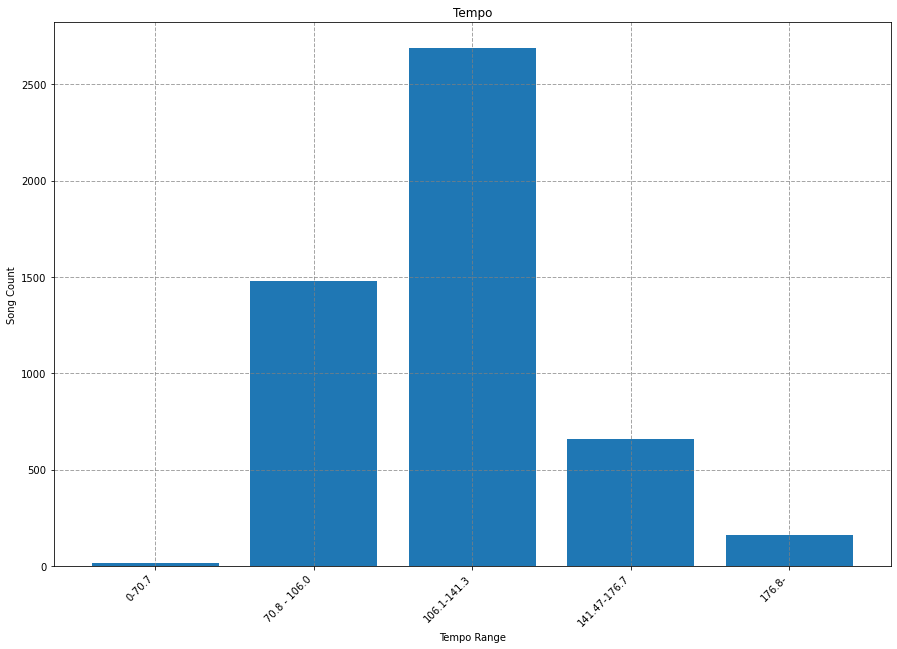

In [74]:
tempo_bin_count = [[len(tempo_bins[0])],[len(tempo_bins[1])],[len(tempo_bins[2])],[len(tempo_bins[3])],[len(tempo_bins[4])]]

x_vals = ['0-70.7','70.8 - 106.0','106.1-141.3','141.47-176.7','176.8-']
y_vals = []
for i in range(len(tempo_bin_count)):
    y_vals.append(tempo_bin_count[i][0])

plot_utils.frequency_chart(x_vals, y_vals,  "Tempo", "Tempo Range", "Song Count")

 # Figure 7
 Shows the distrbution of our 5000 songs based on Valence. A majority of our songs fall in the 41 - 60 range.

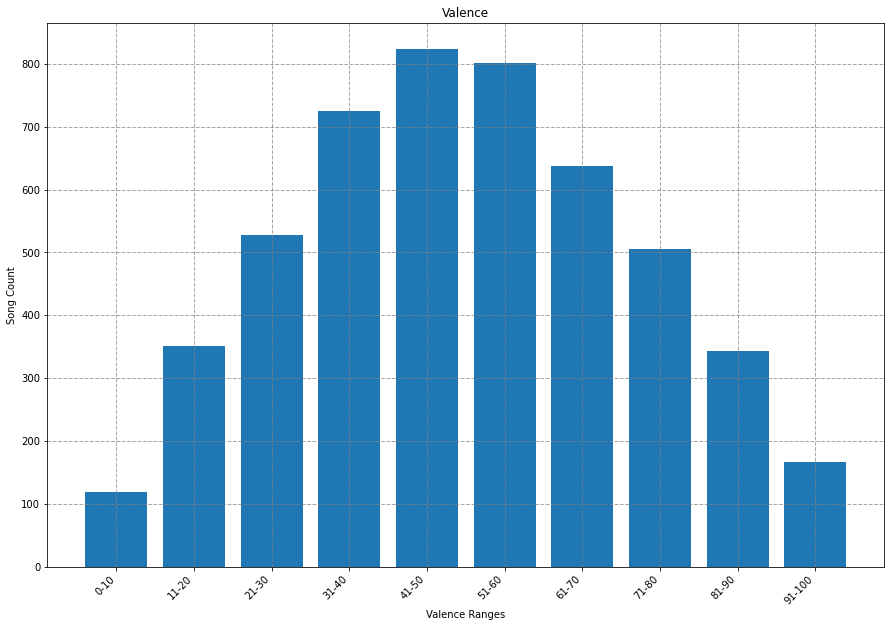

In [75]:
valence_bin_count = [[len(valence_bins[0])],[len(valence_bins[1])],[len(valence_bins[2])],[len(valence_bins[3])],[len(valence_bins[4])],[len(valence_bins[5])],[len(valence_bins[6])],[len(valence_bins[7])],[len(valence_bins[8])],[len(valence_bins[9])]]

x_vals = ['0-10','11-20','21-30','31-40','41-50','51-60','61-70','71-80','81-90','91-100']
y_vals = []
for i in range(len(valence_bin_count)):
    y_vals.append(valence_bin_count[i][0])

plot_utils.frequency_chart(x_vals, y_vals,  "Valence", "Valence Ranges", "Song Count")

# Figure 8
Shows the distrbution of our 5000 songs based on Popularity. A majority of our songs fall in the 61 - 70 range. The fact that there are not that many songs in the 91-100 range could be that there werent many in our dataset to begin with or that having a rank '10' song is quite hard to achieve.

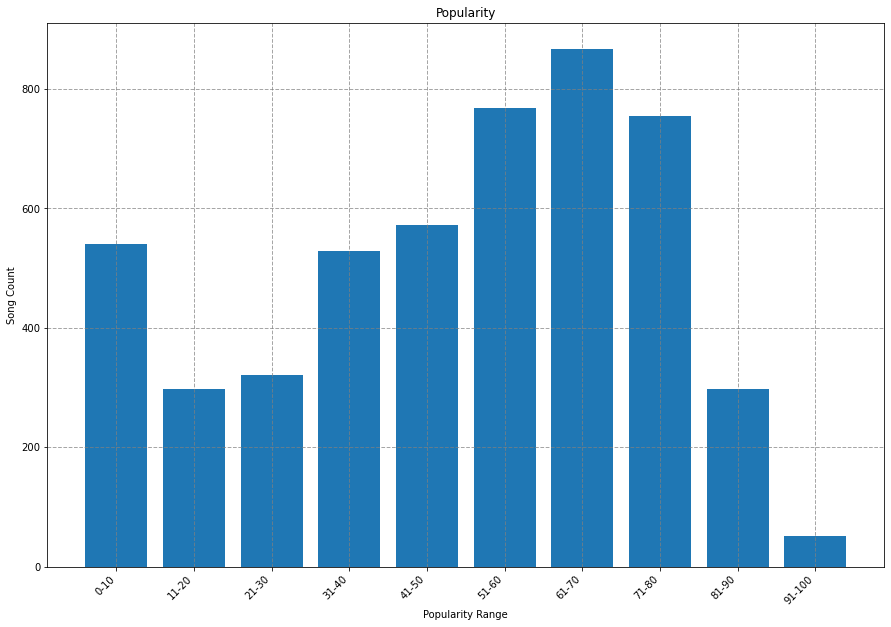

In [76]:
popularity_bin_count = [[len(popularity_bins[0])],[len(popularity_bins[1])],[len(popularity_bins[2])],[len(popularity_bins[3])],[len(popularity_bins[4])],[len(popularity_bins[5])],[len(popularity_bins[6])],[len(popularity_bins[7])],[len(popularity_bins[8])],[len(popularity_bins[9])]]


x_vals = ['0-10','11-20','21-30','31-40','41-50','51-60','61-70','71-80','81-90','91-100']
y_vals = []
for i in range(len(popularity_bin_count)):
    y_vals.append(popularity_bin_count[i][0])

plot_utils.frequency_chart(x_vals, y_vals,  "Popularity", "Popularity Range", "Song Count")

# Figure 9
Shows the average Daceability Distribution for each Popularity bin 

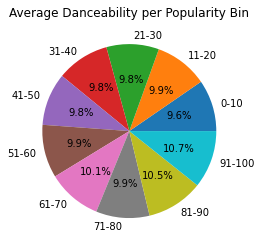

In [77]:
data = myutils.get_popularity_avg(track_data, 11)
data_avg = [[myutils.compute_average(data[0]) * 100],[myutils.compute_average(data[1]) * 100],[myutils.compute_average(data[2]) * 100],[myutils.compute_average(data[3]) * 100],[myutils.compute_average(data[4]) * 100],[myutils.compute_average(data[5]) * 100],[myutils.compute_average(data[6]) * 100],[myutils.compute_average(data[7]) * 100],[myutils.compute_average(data[8]) * 100],[myutils.compute_average(data[9]) * 100]]

x_vals = ['0-10','11-20','21-30','31-40','41-50','51-60','61-70','71-80','81-90','91-100']
y_vals = []
for i in range(len(data_avg)):
    y_vals.append(data_avg[i][0])

plot_utils.percent_global_sales(x_vals, y_vals,  "Average Danceability per Popularity Bin")

# Figure 10
Shows the average Energy Distribution for each Popularity bin 

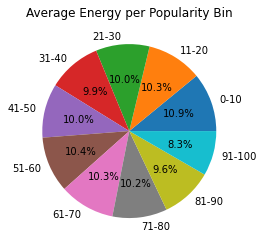

In [78]:
data = myutils.get_popularity_avg(track_data, 12)
data_avg = [[myutils.compute_average(data[0]) * 100],[myutils.compute_average(data[1]) * 100],[myutils.compute_average(data[2]) * 100],[myutils.compute_average(data[3]) * 100],[myutils.compute_average(data[4]) * 100],[myutils.compute_average(data[5]) * 100],[myutils.compute_average(data[6]) * 100],[myutils.compute_average(data[7]) * 100],[myutils.compute_average(data[8]) * 100],[myutils.compute_average(data[9]) * 100]]

x_vals = ['0-10','11-20','21-30','31-40','41-50','51-60','61-70','71-80','81-90','91-100']
y_vals = []
for i in range(len(data_avg)):
    y_vals.append(data_avg[i][0])

plot_utils.percent_global_sales(x_vals, y_vals,  "Average Energy per Popularity Bin")

# Figure 11
Shows the average Loudness Distribution for each Popularity bin. These values range from 0 - (-7).

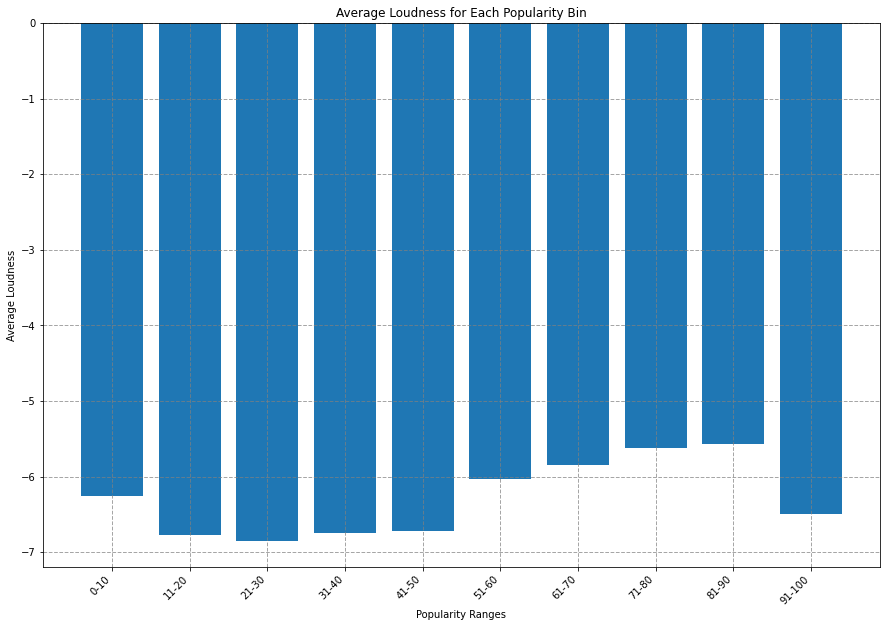

In [79]:
data = myutils.get_popularity_avg(track_data, 14)
data_avg = [[myutils.compute_average(data[0])],[myutils.compute_average(data[1])],[myutils.compute_average(data[2])],[myutils.compute_average(data[3])],[myutils.compute_average(data[4])],[myutils.compute_average(data[5])],[myutils.compute_average(data[6])],[myutils.compute_average(data[7])],[myutils.compute_average(data[8])],[myutils.compute_average(data[9])]]

x_vals = ['0-10','11-20','21-30','31-40','41-50','51-60','61-70','71-80','81-90','91-100']
y_vals = []
for i in range(len(data_avg)):
    y_vals.append(data_avg[i][0])

plot_utils.frequency_chart(x_vals, y_vals,  "Average Loudness for Each Popularity Bin", "Popularity Ranges", "Average Loudness")

# Figure 12
Shows the average Speechiness for each Popularity bin. Based on the graph the most popular songs tend to have an average of more words in them than other songs.

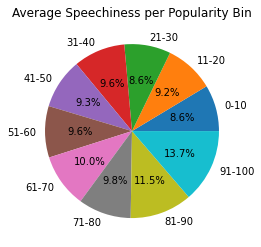

In [80]:
data = myutils.get_popularity_avg(track_data, 16)
data_avg = [[myutils.compute_average(data[0]) * 100],[myutils.compute_average(data[1]) * 100],[myutils.compute_average(data[2]) * 100],[myutils.compute_average(data[3]) * 100],[myutils.compute_average(data[4]) * 100],[myutils.compute_average(data[5]) * 100],[myutils.compute_average(data[6]) * 100],[myutils.compute_average(data[7]) * 100],[myutils.compute_average(data[8]) * 100],[myutils.compute_average(data[9]) * 100]]

x_vals = ['0-10','11-20','21-30','31-40','41-50','51-60','61-70','71-80','81-90','91-100']
y_vals = []
for i in range(len(data_avg)):
    y_vals.append(data_avg[i][0])

plot_utils.percent_global_sales(x_vals, y_vals,  "Average Speechiness per Popularity Bin")

# Figure 13
Shows the average Tempo for each Popularity bin 

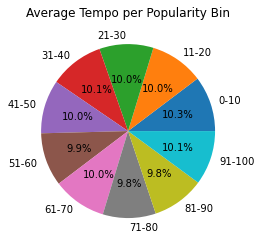

In [81]:
data = myutils.get_popularity_avg(track_data, 21)
data_avg = [[myutils.compute_average(data[0])],[myutils.compute_average(data[1])],[myutils.compute_average(data[2])],[myutils.compute_average(data[3])],[myutils.compute_average(data[4])],[myutils.compute_average(data[5])],[myutils.compute_average(data[6])],[myutils.compute_average(data[7])],[myutils.compute_average(data[8])],[myutils.compute_average(data[9])]]

x_vals = ['0-10','11-20','21-30','31-40','41-50','51-60','61-70','71-80','81-90','91-100']
y_vals = []
for i in range(len(data_avg)):
    y_vals.append(data_avg[i][0])

plot_utils.percent_global_sales(x_vals, y_vals,  "Average Tempo per Popularity Bin")

# Figure 14
Shows the average Valence for each Popularity bin

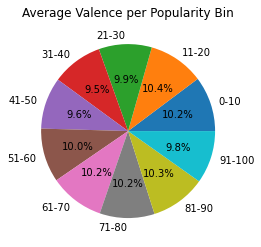

In [82]:
data = myutils.get_popularity_avg(track_data, 20)
data_avg = [[myutils.compute_average(data[0]) * 100],[myutils.compute_average(data[1]) * 100],[myutils.compute_average(data[2]) * 100],[myutils.compute_average(data[3]) * 100],[myutils.compute_average(data[4]) * 100],[myutils.compute_average(data[5]) * 100],[myutils.compute_average(data[6]) * 100],[myutils.compute_average(data[7]) * 100],[myutils.compute_average(data[8]) * 100],[myutils.compute_average(data[9]) * 100]]

x_vals = ['0-10','11-20','21-30','31-40','41-50','51-60','61-70','71-80','81-90','91-100']
y_vals = []
for i in range(len(data_avg)):
    y_vals.append(data_avg[i][0])

plot_utils.percent_global_sales(x_vals, y_vals,  "Average Valence per Popularity Bin")

# Figure 15

This figure shows the correlation between between Popularity vs. Danceability

best fit line: y = 61.7725 + ( 0.0484 )x


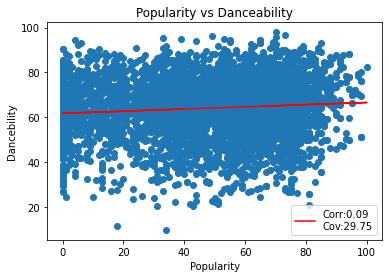

In [83]:
popularity =  track_data.get_column("track_popularity")
danceability = track_data.get_column("danceability")
for i in range(len(danceability)):
    danceability[i] = round(danceability[i] * 100, 2)
plot_utils.plot_scatter(popularity, danceability, "Popularity vs Danceability", "Popularity", "Dancebility")


# Figure 16

This figure shows the correlation between between Popularity vs. Energy

best fit line: y = 73.7546 + ( -0.0563 )x


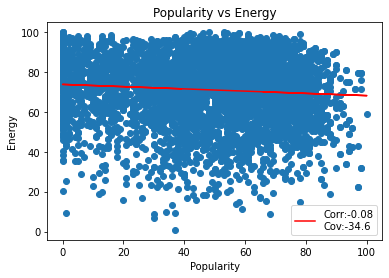

In [84]:
popularity =  track_data.get_column("track_popularity")
energy = track_data.get_column("energy")
for i in range(len(energy)):
    energy[i] = round(energy[i] * 100, 2)
plot_utils.plot_scatter(popularity, energy, "Popularity vs Energy", "Popularity", "Energy")

# Figure 17

This figure shows the correlation between between Popularity vs. Speechiness

best fit line: y = 6.5447 + ( 0.0197 )x


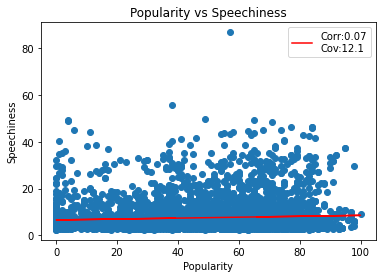

In [85]:
popularity =  track_data.get_column("track_popularity")
speechiness = track_data.get_column("speechiness")
for i in range(len(speechiness)):
    speechiness[i] = round(speechiness[i] * 100, 2)
plot_utils.plot_scatter(popularity, speechiness, "Popularity vs Speechiness", "Popularity", "Speechiness")

# Figure 18

This figure shows the correlation between between Popularity vs. Valence

best fit line: y = 50.3398 + ( 0.0121 )x


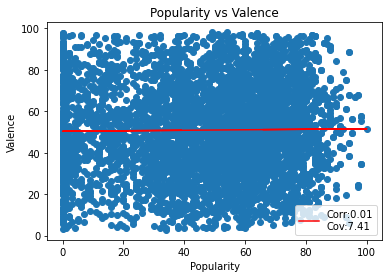

In [86]:
popularity =  track_data.get_column("track_popularity")
valence = track_data.get_column("valence")
for i in range(len(valence)):
    valence[i] = round(valence[i] * 100, 2)
plot_utils.plot_scatter(popularity, valence, "Popularity vs Valence", "Popularity", "Valence")

# Classifier testing

Here we test our three Classifier Naive Bayes, Decision Tree, and Random Forest using Stratified K Fold Cross Validation. 
Random Forest is tested multiple times with differnt N,M, and F values to find the most optimal combination that gives us the best accuracy.

That Combination ended up being M=2, N=7, F=3

In [87]:
genre = track_data.get_column('playlist_subgenre')
danceability = myutils.convert_to_rank(myutils.format_num(track_data.get_column('danceability')))
energy = myutils.convert_to_rank(myutils.format_num(track_data.get_column('energy')))
loudness = myutils.convert_loudness(track_data.get_column('loudness'))
speechiness = myutils.format_num(track_data.get_column('speechiness'))
tempo = myutils.convert_tempo(track_data.get_column('tempo'))
valence = myutils.convert_to_rank(myutils.format_num(track_data.get_column('valence')))

x_vals = [[genre[i], danceability[i], energy[i], loudness[i], speechiness[i], tempo[i], valence[i]] for i in range(len(danceability))]
y_vals = myutils.convert_to_rank(track_data.get_column("track_popularity"))

strat_train_folds, strat_test_folds = myevaluation.stratified_kfold_cross_validation(x_vals, y_vals, 10)
strat_xtrain, strat_ytrain, strat_xtest, strat_ytest = myutils.get_from_folds(x_vals, y_vals, strat_train_folds, strat_test_folds)

myNb = MyNaiveBayesClassifier()
myNb.fit(strat_xtrain, strat_ytrain)

predicted = myNb.predict(strat_xtest)
accuracy = myutils.get_accuracy(strat_ytest, predicted)
print('Nive Bayes: Accuracy =', round(accuracy * 100, 3), 'Error Rate = ', round((1-accuracy) * 100, 3))

Nive Bayes: Accuracy = 44.58 Error Rate =  55.42


In [88]:
genre = track_data.get_column('playlist_subgenre')
danceability = myutils.convert_to_rank(myutils.format_num(track_data.get_column('danceability')))
energy = myutils.convert_to_rank(myutils.format_num(track_data.get_column('energy')))
loudness = myutils.convert_loudness(track_data.get_column('loudness'))
speechiness = myutils.format_num(track_data.get_column('speechiness'))
tempo = myutils.convert_tempo(track_data.get_column('tempo'))
valence = myutils.convert_to_rank(myutils.format_num(track_data.get_column('valence')))

x_vals = [[genre[i], danceability[i], energy[i], loudness[i], speechiness[i], tempo[i], valence[i]] for i in range(len(danceability))]
y_vals = myutils.convert_to_rank(track_data.get_column("track_popularity"))


my_tree = MyDecisionTreeClassifier()
my_tree.fit(strat_xtrain, strat_ytrain)

predicted = my_tree.predict(strat_xtest)
accuracy = myutils.get_accuracy(strat_ytest, predicted)
print('My Decision Tree: Accuracy =', round(accuracy * 100, 3), 'Error Rate = ', round((1-accuracy) * 100, 3))

My Decision Tree: Accuracy = 16.66 Error Rate =  83.34


In [1]:
genre = track_data.get_column('playlist_subgenre')
danceability = myutils.convert_to_rank(myutils.format_num(track_data.get_column('danceability')))
energy = myutils.convert_to_rank(myutils.format_num(track_data.get_column('energy')))
loudness = myutils.convert_loudness(track_data.get_column('loudness'))
speechiness = myutils.format_num(track_data.get_column('speechiness'))
tempo = myutils.convert_tempo(track_data.get_column('tempo'))
valence = myutils.convert_to_rank(myutils.format_num(track_data.get_column('valence')))

x_vals = [[genre[i], danceability[i], energy[i], loudness[i], speechiness[i], tempo[i], valence[i]] for i in range(len(danceability))]
y_vals = myutils.convert_to_rank(track_data.get_column("track_popularity"))


rand_forest = MyRandomForestClassifier()
rand_forest.fit(strat_xtrain, strat_ytrain)
predicted = rand_forest.predict(strat_xtest)
accuracy = myutils.get_accuracy(strat_ytest, predicted)
print('My Decision Tree: Accuracy =', round(accuracy * 100, 3), 'Error Rate = ', round((1-accuracy) * 100, 3))

NameError: name 'track_data' is not defined

In [90]:
rand_forest = MyRandomForestClassifier(3, 7, 2)
rand_forest.fit(strat_xtrain, strat_ytrain)
predicted = rand_forest.predict(strat_xtest)
accuracy = myutils.get_accuracy(strat_ytest, predicted)
print('My Decision Tree: Accuracy =', round(accuracy * 100, 3), 'Error Rate = ', round((1-accuracy) * 100, 3))

My Decision Tree: Accuracy = 21.2 Error Rate =  78.8


In [91]:
rand_forest = MyRandomForestClassifier(4, 10, 5)
rand_forest.fit(strat_xtrain, strat_ytrain)
predicted = rand_forest.predict(strat_xtest)
accuracy = myutils.get_accuracy(strat_ytest, predicted)
print('My Decision Tree: Accuracy =', round(accuracy * 100, 3), 'Error Rate = ', round((1-accuracy) * 100, 3))

My Decision Tree: Accuracy = 18.16 Error Rate =  81.84


In [92]:
rand_forest = MyRandomForestClassifier(5, 30, 2)
rand_forest.fit(strat_xtrain, strat_ytrain)
predicted = rand_forest.predict(strat_xtest)
accuracy = myutils.get_accuracy(strat_ytest, predicted)
print('My Decision Tree: Accuracy =', round(accuracy2 * 100, 3), 'Error Rate = ', round((1-accuracy2) * 100, 3))

KeyboardInterrupt: 

In [44]:
rand_forest = MyRandomForestClassifier(6, 60, 2)
rand_forest.fit(strat_xtrain, strat_ytrain)
predicted = rand_forest.predict(strat_xtest)
accuracy = myutils.get_accuracy(strat_ytest, predicted)
print('My Decision Tree: Accuracy =', round(accuracy * 100, 3), 'Error Rate = ', round((1-accuracy) * 100, 3))

My Decision Tree: Accuracy = 24.38 Error Rate =  75.62


## Get request for endpoint deployed on Heroku

In [45]:
import requests
import json 
url = url = "https://spotify-popularity-classifier.herokuapp.com/predict?sub-genre=electropop&danceability=7&energy=5&loudness=2&speechiness=2&tempo=2&valence=4"

response = requests.get(url=url)

json_object = json.loads(response.text)
print(json_object)

{'prediction': [7]}
